## Support Vector Classification Model - Salary Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
salary_train = pd.read_csv("SalaryData_train(1).csv") #training dataset
salary_test = pd.read_csv("SalaryData_test(1).csv") # testing dataset

In [3]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [4]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
salary_train.native.unique()
salary_train = salary_train.drop(['native','maritalstatus','relationship'],axis=1)

In [6]:
salary_train.head()

,age,workclass,education,educationno,occupation,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Adm-clerical,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Handlers-cleaners,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Prof-specialty,Black,Female,0,0,40,<=50K


In [7]:
salary_train['sex']=pd.get_dummies(salary_train.sex,drop_first=True)

In [8]:
sal_dummy = pd.get_dummies(salary_train[['workclass', 'education','occupation','race']])

In [9]:
salary_train["Salary"] = pd.get_dummies(salary_train.Salary,drop_first=True)

In [10]:
salary_train.drop(['workclass', 'education','occupation','race'],axis=1,inplace=True)

In [11]:
salary_train = pd.concat([salary_train,sal_dummy],axis=1)

In [12]:
X_train = salary_train.drop(['Salary'],axis=1)
Y_train = salary_train['Salary']

In [13]:
salary_test = salary_test.drop(['native','maritalstatus','relationship'],axis=1)
salary_test['sex']=pd.get_dummies(salary_test.sex,drop_first=True)
sal_dummy = pd.get_dummies(salary_test[['workclass', 'education','occupation','race']])
salary_test["Salary"]=pd.get_dummies(salary_test.Salary,drop_first=True)
salary_test.drop(['workclass', 'education','occupation','race'],axis=1,inplace=True)
salary_test = pd.concat([salary_test,sal_dummy],axis=1)
X_test = salary_test.drop(['Salary'],axis=1)
Y_test = salary_test['Salary']

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaled_Xtrain = scaler.fit_transform(X_train)
scaled_Xtest = scaler.transform(X_test)

In [16]:
model = SVC(kernel ='linear')

In [17]:
#model.fit(X_train.head(5000),Y_train.head(5000))
model.fit(X_train.head(500),Y_train.head(500))

SVC(kernel='linear')

In [18]:
y_pred = model.predict(scaled_Xtest)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [20]:
accuracy_score(Y_test,y_pred)

0.7553784860557768

In [21]:
confusion_matrix(Y_test,y_pred)

array([[10934,   426],
       [ 3258,   442]], dtype=int64)

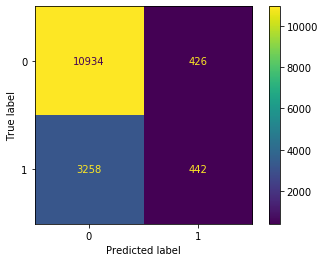

In [22]:
plot_confusion_matrix(model,scaled_Xtest,Y_test)

In [23]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86     11360
           1       0.51      0.12      0.19      3700

    accuracy                           0.76     15060
   macro avg       0.64      0.54      0.52     15060
weighted avg       0.71      0.76      0.69     15060



#### I have used only 500 data points to train Linear SVC model as it was taking long time for whole dataset
#### from above report we can say that acuuracy and f1 score can improve with more training dataset for linear SVC model